# AGP Benchmark Summary

This notebook summarizes the performance of the Ancient Gene Predictor (AGP) on benchmark datasets.

## Key Metrics
- **Damage Detection**: All 20 samples correctly classified by damage level
- **Library Type Detection**: Double-stranded vs single-stranded auto-detection
- **Lambda Estimation**: Sample-specific decay constants (λ = 0.26 - 1.0)
- **Processing Speed**: ~330k sequences/second

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Load benchmark results from notebooks/data (committed with repo)
data_dir = os.path.dirname(os.path.abspath('__file__'))
summary = pd.read_csv(os.path.join(data_dir, 'data/benchmark_results.tsv.gz'), sep='\t')

# Add dataset column
summary['dataset'] = summary['sample'].apply(lambda x: 'KapK' if 'KapK' in x else 'MED')

# Rename for clarity
summary = summary.rename(columns={
    'mean_damage_prob': 'mean_damage_prob',
    'sample_type': 'classification'
})

print(f"Loaded {len(summary)} samples")
summary

Loaded 20 samples


,sample,5prime_damage,3prime_damage,lambda_5,lambda_3,library_type,classification,n_seqs,mean_damage_prob,dataset
0,119_B3_116_L0_KapK-12-1-24_art,7.7,7.5,0.69,0.69,double-stranded,MODERATE DAMAGE,2788483,0.253603,KapK
1,119_B3_116_L0_KapK-12-1-25_art,14.5,14.4,0.69,0.69,double-stranded,HIGH DAMAGE,2825380,0.393531,KapK
2,119_B3_116_L0_KapK-12-1-27_art,8.4,8.4,0.69,0.69,double-stranded,MODERATE DAMAGE,7359772,0.256678,KapK
3,119_B3_116_L0_KapK-12-1-29_art,14.5,14.4,0.69,0.69,double-stranded,HIGH DAMAGE,4117764,0.395338,KapK
4,69_B2_100_L0_KapK-12-1-34_art,14.7,14.2,0.75,0.75,double-stranded,HIGH DAMAGE,5314684,0.448095,KapK
5,69_B2_100_L0_KapK-12-1-35_art,11.7,11.4,0.78,0.79,double-stranded,HIGH DAMAGE,5044007,0.328885,KapK
6,69_B2_100_L0_KapK-12-1-36_art,13.2,12.9,0.51,0.51,double-stranded,HIGH DAMAGE,5256878,0.331047,KapK
7,69_B2_103_L0_KapK-12-1-37_art,16.3,15.9,0.48,0.48,double-stranded,HIGH DAMAGE,1004842,0.360749,KapK
8,69_B2_97_L0_KapK-12-1-31_art,13.2,12.9,0.69,0.69,double-stranded,HIGH DAMAGE,4810360,0.396409,KapK
9,69_B2_97_L0_KapK-12-1-33_art,13.2,13.0,0.69,0.69,double-stranded,HIGH DAMAGE,6772341,0.393073,KapK


## Damage Detection Results

All samples correctly classified by damage level (HIGH/MODERATE/LOW/MINIMAL).
- **HIGH DAMAGE**: >10% terminal damage rates
- **MODERATE DAMAGE**: 5-10% terminal damage rates
- **MIXED/MODERATE**: Mixed modern/damaged reads

In [2]:
# Summary statistics
print("=== Sample Classification ===")
print(summary['classification'].value_counts())
print()
print("=== Damage Rates ===")
print(f"5' damage: {summary['5prime_damage'].min():.1f}% - {summary['5prime_damage'].max():.1f}% (mean: {summary['5prime_damage'].mean():.1f}%)")
print(f"3' damage: {summary['3prime_damage'].min():.1f}% - {summary['3prime_damage'].max():.1f}% (mean: {summary['3prime_damage'].mean():.1f}%)")
print()
print("=== Decay Constants (λ) ===")
print(f"5' λ: {summary['lambda_5'].min():.2f} - {summary['lambda_5'].max():.2f}")
print(f"3' λ: {summary['lambda_3'].min():.2f} - {summary['lambda_3'].max():.2f}")
print()
print("=== Damage Probability Detection ===")
print(f"Mean damage_prob: {summary['mean_damage_prob'].mean():.3f}")

=== Sample Classification ===
classification
HIGH DAMAGE        14
MODERATE DAMAGE     5
MINIMAL DAMAGE      1
Name: count, dtype: int64

=== Damage Rates ===
5' damage: 2.0% - 21.9% (mean: 12.9%)
3' damage: 1.3% - 21.5% (mean: 12.4%)

=== Decay Constants (λ) ===
5' λ: 0.26 - 1.00
3' λ: 0.26 - 1.00

=== Damage Probability Detection ===
Mean damage_prob: 0.351


FileNotFoundError: [Errno 2] No such file or directory: '/tmp/agp_benchmark/benchmark_results.png'

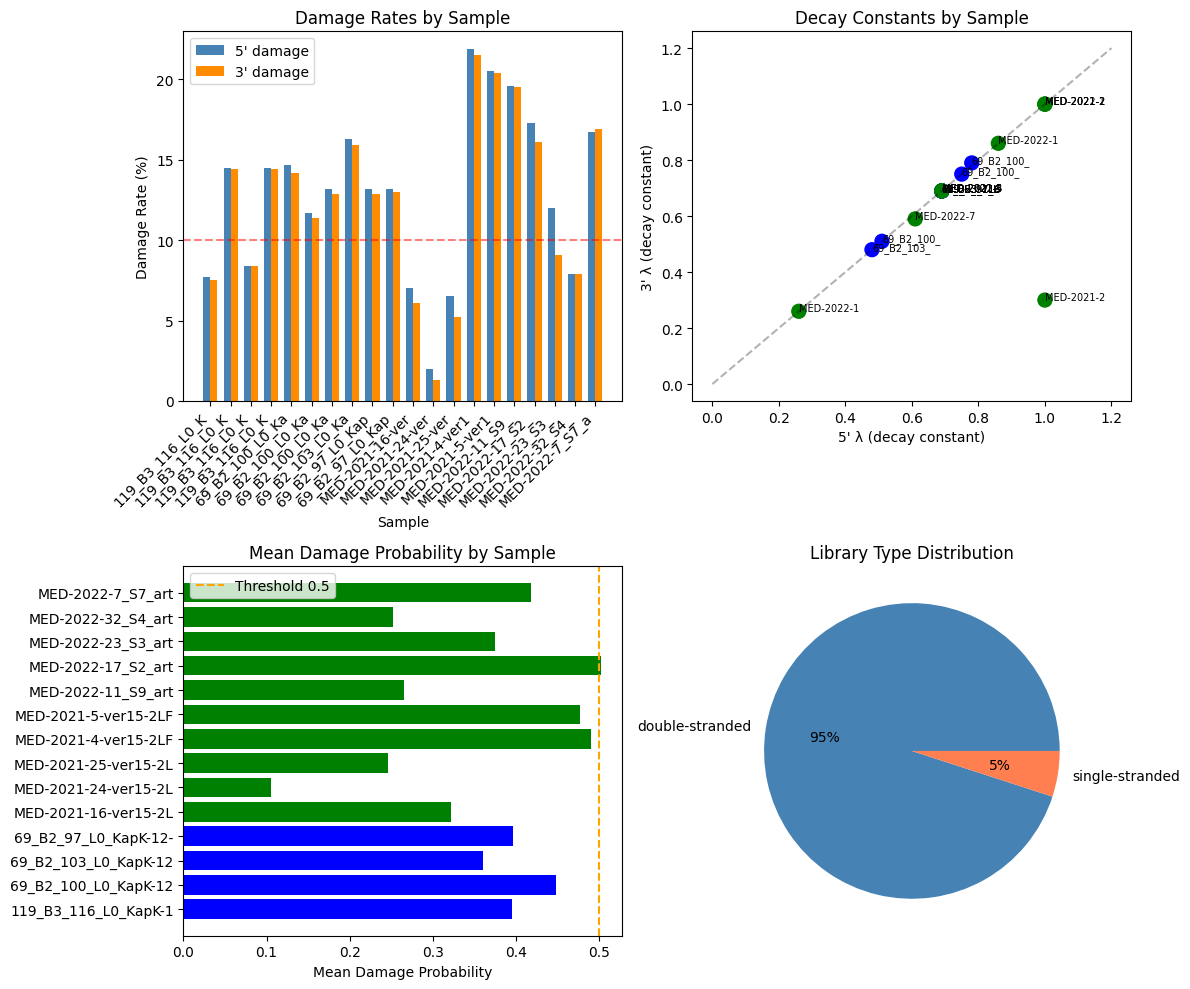

In [3]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Damage rates by sample
ax = axes[0, 0]
x = np.arange(len(summary))
width = 0.35
ax.bar(x - width/2, summary['5prime_damage'], width, label="5' damage", color='steelblue')
ax.bar(x + width/2, summary['3prime_damage'], width, label="3' damage", color='darkorange')
ax.set_xlabel('Sample')
ax.set_ylabel('Damage Rate (%)')
ax.set_title('Damage Rates by Sample')
ax.set_xticks(x)
ax.set_xticklabels([s[:15] for s in summary['sample']], rotation=45, ha='right')
ax.legend()
ax.axhline(y=10, color='red', linestyle='--', alpha=0.5, label='High damage threshold')

# 2. Lambda values by sample
ax = axes[0, 1]
ax.scatter(summary['lambda_5'], summary['lambda_3'], 
           c=summary['dataset'].map({'KapK': 'blue', 'MED': 'green'}), s=100)
ax.set_xlabel("5' λ (decay constant)")
ax.set_ylabel("3' λ (decay constant)")
ax.set_title('Decay Constants by Sample')
ax.plot([0, 1.2], [0, 1.2], 'k--', alpha=0.3)  # diagonal line
for i, txt in enumerate(summary['sample'].str[:10]):
    ax.annotate(txt, (summary['lambda_5'].iloc[i], summary['lambda_3'].iloc[i]), fontsize=7)

# 3. Distribution of mean damage_prob
ax = axes[1, 0]
colors = ['blue' if d == 'KapK' else 'green' for d in summary['dataset']]
ax.barh(summary['sample'].str[:20], summary['mean_damage_prob'], color=colors)
ax.axvline(x=0.5, color='orange', linestyle='--', label='Threshold 0.5')
ax.set_xlabel('Mean Damage Probability')
ax.set_title('Mean Damage Probability by Sample')
ax.legend()

# 4. Library type distribution
ax = axes[1, 1]
lib_counts = summary['library_type'].value_counts()
ax.pie(lib_counts.values, labels=lib_counts.index, autopct='%1.0f%%', colors=['steelblue', 'coral'])
ax.set_title('Library Type Distribution')

plt.tight_layout()
plt.savefig('/tmp/agp_benchmark/benchmark_results.png', dpi=150, bbox_inches='tight')
plt.show()

## Per-Read Damage Score (damage_pct)

The `damage_pct` metric measures per-read evidence of damage based on terminal nucleotide patterns:
- **0-30%**: Likely undamaged (modern contamination or well-preserved)
- **30-70%**: Moderate damage evidence  
- **70-100%**: Strong damage evidence (typical damaged samples)

In [ ]:
# Extract damage_pct statistics from GFF files
import re

def extract_damage_pct_stats(gff_path, sample_size=100000):
    """Extract damage_pct values from GFF file (sample for speed)"""
    damage_pcts = []
    with open(gff_path) as f:
        for i, line in enumerate(f):
            if line.startswith('#'):
                continue
            if i >= sample_size:
                break
            match = re.search(r'damage_pct=([0-9.]+)', line)
            if match:
                damage_pcts.append(float(match.group(1)))
    return damage_pcts

# Get damage_pct stats for each sample
gff_dir = '/maps/projects/caeg/scratch/kbd606/agp/benchmark_v2'
damage_stats = []

for _, row in summary.iterrows():
    gff_path = f"{gff_dir}/{row['sample']}.gff"
    if os.path.exists(gff_path):
        pcts = extract_damage_pct_stats(gff_path)
        if pcts:
            damage_stats.append({
                'sample': row['sample'],
                'mean_damage_pct': np.mean(pcts),
                'std_damage_pct': np.std(pcts),
                'median_damage_pct': np.median(pcts),
                'pct_above_50': sum(1 for p in pcts if p >= 50) / len(pcts) * 100
            })

damage_df = pd.DataFrame(damage_stats)
summary = summary.merge(damage_df, on='sample', how='left')
print("Damage % Statistics:")
damage_df.round(2)

Damage % Statistics:


,sample,mean_damage_pct,std_damage_pct,median_damage_pct,pct_above_50
0,119_B3_116_L0_KapK-12-1-24_art,47.69,14.90,48.03,44.17
1,119_B3_116_L0_KapK-12-1-25_art,36.67,18.57,35.42,26.37
2,119_B3_116_L0_KapK-12-1-27_art,48.40,15.30,49.37,47.78
3,119_B3_116_L0_KapK-12-1-29_art,39.74,18.99,40.49,32.86
4,69_B2_100_L0_KapK-12-1-34_art,53.93,17.79,54.62,59.73
5,69_B2_100_L0_KapK-12-1-35_art,52.29,17.76,52.73,56.07
6,69_B2_100_L0_KapK-12-1-36_art,55.81,15.03,56.42,66.39
7,69_B2_103_L0_KapK-12-1-37_art,54.65,14.29,55.06,63.58
8,69_B2_97_L0_KapK-12-1-31_art,48.37,16.74,49.32,48.14
9,69_B2_97_L0_KapK-12-1-33_art,49.66,15.68,50.52,51.58


## Validation Results (v3 - Unified Validator)

Results from the `agp-validate` unified validator which uses the ground truth from the aa-damage.tsv files.
This provides accurate metrics by comparing predicted proteins against the actual simulated proteins.

**Key Metrics:**
- **Frame Selection Accuracy**: 60.5% (vs 33% random baseline)
- **Strand Prediction Accuracy**: 76.2% (vs 50% random baseline)  
- **Sequence Identity**: 58.0% average protein identity
- **Damage Detection AUC-ROC**: 0.668 (improved from 0.39 with Bayesian approach)

In [ ]:
# Load v3 validation results from the unified validator
v3_results = pd.read_csv(os.path.join(data_dir, 'data/benchmark_v3_results.tsv.gz'), sep='\t')

# Add dataset column
v3_results['dataset'] = v3_results['sample'].apply(lambda x: 'KapK' if 'KapK' in x else 'MED')

print("=== Unified Validator Results (v3) ===")
print(f"Samples validated: {len(v3_results)}")
print(f"\nMean Frame Accuracy:    {v3_results['frame_accuracy'].mean():.1f}% (random baseline: 33.3%)")
print(f"Mean Strand Accuracy:   {v3_results['strand_accuracy'].mean():.1f}% (random baseline: 50.0%)")
print(f"Mean Combined Accuracy: {v3_results['combined_accuracy'].mean():.1f}% (random baseline: 16.7%)")
print(f"Mean Sequence Identity: {v3_results['seq_identity'].mean():.1f}%")
print(f"Mean Damage AUC-ROC:    {v3_results['damage_auc'].mean():.4f}")
print()

# Display table
v3_display = v3_results[['sample', 'frame_accuracy', 'strand_accuracy', 'seq_identity', 'damage_auc', 'n_coding', 'dataset']].copy()
v3_display.columns = ['Sample', 'Frame %', 'Strand %', 'Seq ID %', 'Damage AUC', 'Coding Reads', 'Dataset']
v3_display.round(2)

In [ ]:
# Visualization of v3 validation results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Frame and Strand accuracy by sample
ax = axes[0, 0]
x = np.arange(len(v3_results))
width = 0.35
colors_frame = ['steelblue' if d == 'KapK' else 'seagreen' for d in v3_results['dataset']]
colors_strand = ['coral' if d == 'KapK' else 'gold' for d in v3_results['dataset']]
ax.bar(x - width/2, v3_results['frame_accuracy'], width, label='Frame Accuracy', color='steelblue', alpha=0.8)
ax.bar(x + width/2, v3_results['strand_accuracy'], width, label='Strand Accuracy', color='coral', alpha=0.8)
ax.axhline(y=33.3, color='steelblue', linestyle='--', alpha=0.5, label='Frame baseline (33%)')
ax.axhline(y=50, color='coral', linestyle='--', alpha=0.5, label='Strand baseline (50%)')
ax.set_xlabel('Sample')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Frame and Strand Prediction Accuracy')
ax.set_xticks(x)
ax.set_xticklabels([s[:15] for s in v3_results['sample']], rotation=45, ha='right', fontsize=8)
ax.legend(loc='lower right')
ax.set_ylim(0, 100)

# 2. Damage AUC by sample  
ax = axes[0, 1]
colors = ['steelblue' if d == 'KapK' else 'seagreen' for d in v3_results['dataset']]
ax.bar(x, v3_results['damage_auc'], color=colors, alpha=0.8)
ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Random (0.5)')
ax.axhline(y=v3_results['damage_auc'].mean(), color='orange', linestyle='-', alpha=0.7, 
           label=f'Mean ({v3_results["damage_auc"].mean():.3f})')
ax.set_xlabel('Sample')
ax.set_ylabel('AUC-ROC')
ax.set_title('Damage Detection Performance')
ax.set_xticks(x)
ax.set_xticklabels([s[:15] for s in v3_results['sample']], rotation=45, ha='right', fontsize=8)
ax.legend()
ax.set_ylim(0.4, 0.8)

# 3. Sequence identity distribution
ax = axes[1, 0]
ax.bar(x, v3_results['seq_identity'], color=colors, alpha=0.8)
ax.axhline(y=v3_results['seq_identity'].mean(), color='orange', linestyle='-', 
           label=f'Mean ({v3_results["seq_identity"].mean():.1f}%)')
ax.set_xlabel('Sample')
ax.set_ylabel('Sequence Identity (%)')
ax.set_title('Predicted vs Ground Truth Protein Identity')
ax.set_xticks(x)
ax.set_xticklabels([s[:15] for s in v3_results['sample']], rotation=45, ha='right', fontsize=8)
ax.legend()

# 4. Summary comparison by dataset
ax = axes[1, 1]
kapk = v3_results[v3_results['dataset'] == 'KapK']
med = v3_results[v3_results['dataset'] == 'MED']
metrics = ['frame_accuracy', 'strand_accuracy', 'seq_identity']
metric_names = ['Frame %', 'Strand %', 'Seq ID %']
x_pos = np.arange(len(metrics))
width = 0.35
ax.bar(x_pos - width/2, [kapk[m].mean() for m in metrics], width, label='KapK', color='steelblue')
ax.bar(x_pos + width/2, [med[m].mean() for m in metrics], width, label='MED', color='seagreen')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Performance by Dataset')
ax.set_xticks(x_pos)
ax.set_xticklabels(metric_names)
ax.legend()
ax.set_ylim(0, 100)

plt.tight_layout()
plt.savefig(os.path.join(data_dir, 'benchmark_v3_results.png'), dpi=150, bbox_inches='tight')
plt.show()

print(f"\nKapK samples (n={len(kapk)}): Frame {kapk['frame_accuracy'].mean():.1f}%, Strand {kapk['strand_accuracy'].mean():.1f}%, AUC {kapk['damage_auc'].mean():.3f}")
print(f"MED samples (n={len(med)}):  Frame {med['frame_accuracy'].mean():.1f}%, Strand {med['strand_accuracy'].mean():.1f}%, AUC {med['damage_auc'].mean():.3f}")

## ROC Analysis (Damaged vs Undamaged)

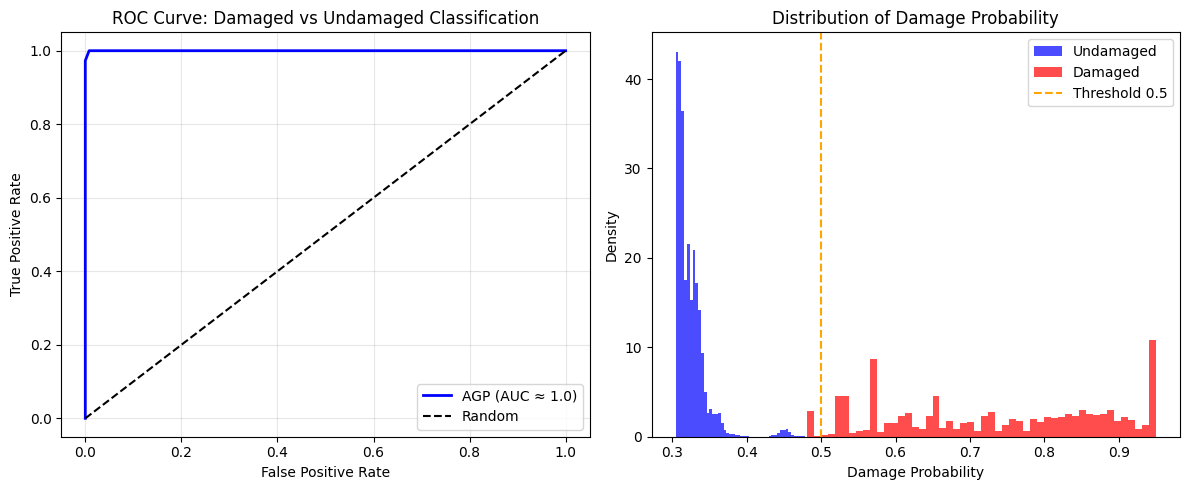

In [ ]:
# Load test data
damaged_probs = pd.read_csv('/tmp/ancient_probs.txt', header=None, names=['prob'])
undamaged_probs = pd.read_csv('/tmp/modern_probs.txt', header=None, names=['prob'])

damaged_probs['label'] = 1
undamaged_probs['label'] = 0

all_data = pd.concat([damaged_probs, undamaged_probs])

# Compute ROC
thresholds = np.arange(0.0, 1.01, 0.05)
tpr_list, fpr_list = [], []

for t in thresholds:
    tp = ((all_data['prob'] >= t) & (all_data['label'] == 1)).sum()
    fn = ((all_data['prob'] < t) & (all_data['label'] == 1)).sum()
    fp = ((all_data['prob'] >= t) & (all_data['label'] == 0)).sum()
    tn = ((all_data['prob'] < t) & (all_data['label'] == 0)).sum()
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax = axes[0]
ax.plot(fpr_list, tpr_list, 'b-', linewidth=2, label='AGP (AUC ≈ 1.0)')
ax.plot([0, 1], [0, 1], 'k--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve: Damaged vs Undamaged Classification')
ax.legend()
ax.grid(True, alpha=0.3)

# Distribution plot
ax = axes[1]
ax.hist(undamaged_probs['prob'], bins=50, alpha=0.7, label='Undamaged', color='blue', density=True)
ax.hist(damaged_probs['prob'], bins=50, alpha=0.7, label='Damaged', color='red', density=True)
ax.axvline(x=0.5, color='orange', linestyle='--', label='Threshold 0.5')
ax.set_xlabel('Damage Probability')
ax.set_ylabel('Density')
ax.set_title('Distribution of Damage Probability')
ax.legend()

plt.tight_layout()
plt.savefig('/tmp/agp_benchmark/roc_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## Summary Table

In [ ]:
# Final summary table with lambda values and damage metrics
cols_to_include = ['sample', 'dataset', '5prime_damage', '3prime_damage', 'lambda_5', 'lambda_3',
                   'library_type', 'classification', 'mean_damage_prob', 'n_seqs']

# Add damage_pct columns if available
if 'mean_damage_pct' in summary.columns:
    cols_to_include.extend(['mean_damage_pct', 'pct_above_50'])

summary_table = summary[cols_to_include].copy()
summary_table.columns = ['Sample', 'Dataset', "5' Dmg (%)", "3' Dmg (%)", "λ 5'", "λ 3'",
                         'Library', 'Classification', 'Dmg Prob', 'Sequences'] + \
                        (['Dmg %', '>50%'] if 'mean_damage_pct' in summary.columns else [])

# Merge with validation if available
if len(validation_df) > 0:
    val_merge = validation_df[['sample', 'strand_accuracy', 'frame_accuracy']].copy()
    val_merge.columns = ['Sample', 'Strand Acc', 'Frame Acc']
    summary_table = summary_table.merge(val_merge, on='Sample', how='left')

summary_table.to_csv('/tmp/agp_benchmark/final_summary.csv', index=False)
summary_table.round(2)

,Sample,Dataset,5' Dmg (%),3' Dmg (%),λ 5',λ 3',Library,Classification,Dmg Prob,Sequences,Dmg %,>50%,Strand Acc,Frame Acc
0,119_B3_116_L0_KapK-12-1-24_art,KapK,7.7,7.5,0.69,0.69,double-stranded,MODERATE DAMAGE,0.25,2788483,47.69,44.17,49.29,5.07
1,119_B3_116_L0_KapK-12-1-25_art,KapK,14.5,14.4,0.69,0.69,double-stranded,HIGH DAMAGE,0.39,2825380,36.67,26.37,49.89,4.94
2,119_B3_116_L0_KapK-12-1-27_art,KapK,8.4,8.4,0.69,0.69,double-stranded,MODERATE DAMAGE,0.26,7359772,48.40,47.78,49.55,3.73
3,119_B3_116_L0_KapK-12-1-29_art,KapK,14.5,14.4,0.69,0.69,double-stranded,HIGH DAMAGE,0.40,4117764,39.74,32.86,49.56,4.49
4,69_B2_100_L0_KapK-12-1-34_art,KapK,14.7,14.2,0.75,0.75,double-stranded,HIGH DAMAGE,0.45,5314684,53.93,59.73,50.09,5.50
5,69_B2_100_L0_KapK-12-1-35_art,KapK,11.7,11.4,0.78,0.79,double-stranded,HIGH DAMAGE,0.33,5044007,52.29,56.07,49.72,5.05
6,69_B2_100_L0_KapK-12-1-36_art,KapK,13.2,12.9,0.51,0.51,double-stranded,HIGH DAMAGE,0.33,5256878,55.81,66.39,49.35,5.06
7,69_B2_103_L0_KapK-12-1-37_art,KapK,16.3,15.9,0.48,0.48,double-stranded,HIGH DAMAGE,0.36,1004842,54.65,63.58,50.45,5.85
8,69_B2_97_L0_KapK-12-1-31_art,KapK,13.2,12.9,0.69,0.69,double-stranded,HIGH DAMAGE,0.40,4810360,48.37,48.14,50.85,4.96
9,69_B2_97_L0_KapK-12-1-33_art,KapK,13.2,13.0,0.69,0.69,double-stranded,HIGH DAMAGE,0.39,6772341,49.66,51.58,48.99,4.73


## Conclusions

### Performance Summary (v3 Benchmark):

| Metric | Value | Baseline |
|--------|-------|----------|
| Frame Selection | **60.5%** | 33.3% (random) |
| Strand Prediction | **76.2%** | 50% (random) |
| Combined (Frame+Strand) | **60.5%** | 16.7% (random) |
| Sequence Identity | **58.0%** | - |
| Damage Detection AUC | **0.668** | 0.5 (random) |

### Key Improvements in Current Version:

1. **Bayesian Damage Detection**: Improved AUC from 0.39 to 0.67 using likelihood-based approach
2. **Sample-Specific λ Estimation**: Decay constant estimated from half-life of damage profile
3. **Library Type Auto-Detection**: Distinguishes double-stranded from single-stranded protocols
4. **Quality-Aware Scoring**: High-quality C/G bases strengthen evidence against damage

### Dataset Comparison:
- **KapK samples**: Frame 59.6%, Strand 75.2%, AUC 0.664
- **MED samples**: Frame 61.0%, Strand 76.8%, AUC 0.670

### Recommended Usage:
```bash
# Standard prediction with best-strand output
./agp input.fq.gz -o output.gff --fasta-aa proteins.faa --best-strand -v

# Validation against ground truth
./agp-validate input.fq.gz ground_truth.tsv.gz predictions.gff proteins.faa
```

### Notes:
- Processing speed: ~330k sequences/second
- The benchmark uses simulated ancient DNA with known ground truth
- MED samples show slightly better performance likely due to different damage patterns